<a href="https://www.kaggle.com/code/ashadullah/sign-language-mnist-using-cnns?scriptVersionId=165428384" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<iframe src="https://giphy.com/embed/HgycnYQCMeJXO" width="480" height="372" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/sky-hello-clouds-HgycnYQCMeJXO">via GIPHY</a></p>

<h1 style="font-family:verdana;"> <center><b>✋ Sign Language MNIST Using CNNs</b></center> </h1>

# 👋Welcome to this notebook!
<div class="alert alert-block alert-info" style="font-size:20px; font-family:verdana;">
    Today, I would like to share a piece of work! A mini project which I have been working on..
    In this notebook I have trained a CNN on the Sign Language Dataset on Kaggle! I was able to achieve fairly reasonable results on the training and the validation data!
</div>

# So,before moving on what are CNNs?
<center><img src='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*-9yF-a8gUktDKgRpuNuxNA.png' 
     height=150px width=800px /></center>
     
<div style="background-color:#fff1cc; padding: 20px;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Convolutional Neural Networks or CNNs stand as a cornerstone in modern machine learning and computer vision. Inspired by the human visual system, CNNs are a specialized class of artificial neural networks designed to excel at tasks like image recognition, object detection, and image classification. What sets CNNs apart is their ability to automatically learn and extract hierarchical features from raw pixel data, effectively capturing intricate patterns and structures within images. This is achieved through convolutional layers that apply filters to convolve across the input data, followed by pooling layers that reduce spatial dimensions while retaining important information. The resulting learned features enable CNNs to identify complex visual patterns with remarkable accuracy, making them invaluable tools in a wide array of applications, including medical imaging, self-driving cars, and facial recognition systems.</p>

<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Convolutional Neural Networks (CNNs) have found extensive applications in various domains due to their exceptional ability to extract meaningful features from visual data. Here are eight prominent applications of CNNs in the modern world:</p>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">
--> Image Classification: CNNs excel at image classification tasks by learning and recognizing patterns within images, enabling them to accurately categorize objects, animals, and scenes, among other things.</p>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">
--> Object Detection: CNNs are crucial for object detection in images and videos, enabling systems to identify and locate multiple objects within a scene, forming the backbone of technologies like autonomous vehicles and surveillance systems.</p>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">
--> Face Recognition: CNNs power facial recognition systems, allowing them to identify and authenticate individuals from images or video frames, with applications in security, access control, and personalized user experiences.</p>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">
--> Medical Imaging: In the medical field, CNNs aid in diagnosing diseases by analyzing medical images like X-rays, MRIs, and CT scans, assisting doctors in accurate and swift diagnosis.</p>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">
--> Artificial Intelligence in Gaming: CNNs enhance gaming experiences by enabling real-time object tracking, gesture recognition, and character animation based on human movement and expressions.</p>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">
--> Image Style Transfer: CNNs can transform the style of an image, transferring the artistic characteristics of one image to another, leading to novel visual effects and artistic creations.</p>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">
--> Autonomous Vehicles: CNNs play a pivotal role in self-driving cars by detecting pedestrians, road signs, lanes, and obstacles, allowing vehicles to navigate safely and make informed decisions.</p>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">
--> Natural Language Processing (NLP): CNNs are also applied to NLP tasks, such as text classification and sentiment analysis, by converting textual data into image-like representations, enabling efficient feature extraction.</p>
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">
These applications showcase the versatility of CNNs and their impact on diverse fields, revolutionizing industries and enhancing our technological capabilities.</p>

# 🏗️Import Necessary Libraries

<p style="font-size:20px; font-family:verdana; line-height: 1.7em">We will now be importing several necessary libraries for the execution of this notebook in the next cell!.</p>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
import matplotlib.pyplot as plt
import numpy as np
import csv
import string
import graphviz
import pydot

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

# 📄 Loading the data

In [2]:
validation = '/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv'

In [3]:
training = '/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv'

# 𝑓 Function to parse the data
<div style="background-color:#d4f1f4; padding: 20px;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">We will now create a function called <b>parse_data(filename)</b> for helping us load the data, it will separate the images and labels from the file and as pretty evident it takes the filename as input <i>(also the filename here is the pathname as well)</i></p>
</div>

In [4]:
# Parsing the dataset
def parse_data(filename):
    with open(filename) as file:
        csv_reader = csv.reader(file, delimiter=',')
        labels = []
        images = []
        next(csv_reader, None)
        for row in csv_reader:
            label = row[0]
            image = row[1:]
            image = np.array(image).reshape((28, 28))
            
            labels.append(label)
            images.append(image)
            
        images = np.array(images).astype(float)
        labels = np.array(labels).astype(float)
    return images, labels

## **Splitting the data into train and validation sets :**

In [5]:
training_images, training_labels = parse_data(training)
validation_images, validation_labels = parse_data(validation)

In [6]:
# Visualizing the shapes of the data
print(f"training images have shape : {training_images.shape}")
print(f"training labels have shape : {training_labels.shape}")
print(f"validation images have shape : {validation_images.shape}")
print(f"validation labels have shape : {validation_labels.shape}")

training images have shape : (27455, 28, 28)
training labels have shape : (27455,)
validation images have shape : (7172, 28, 28)
validation labels have shape : (7172,)


## **Expanding the dimensions of the images**
<div style="background-color:#fff1cc; padding: 20px;">
 
<p style="font-size:20px; font-family:verdana; line-height: 1.7em"><b>Why expand the dimensions you ask?</b><br>
    Well, because :<br>
    --> CNNs typically require input data to have a certain shape, often represented as (batch_size, height, width, channels). The "channels" dimension represents the color channels of the image, such as RGB (3 channels) or grayscale (1 channel). Expanding dimensions ensures that the input data complies with the required shape.
    </p>
</div>

In [7]:
# Expanding the dimensions of the training and validation set to make them (10000, 28, 28, 1)
training_images = np.expand_dims(training_images, axis=3)
validation_images = np.expand_dims(validation_images, axis=3)

# 𝑓 Function to yield data 
<div style="background-color:#d4f1f4; padding: 20px;">
<p style="font-size:18px; font-family:verdana; line-height: 1.7em">Now we will call <b>ImageDataGenerator</b> this will yield the batches of images for both the training and validation.</p>
<p style="font-size:18px; font-family:verdana; line-height: 1.7em">We will call the <b>ImageDataGenerator</b> in the function img_generator() which is defined in the cell below.</p>
<p style="font-size:18px; font-family:verdana; line-height: 1.7em"><b>The img_generator()</b> function will take the training and validation images as well as the labels for input.</p>
</div>

In [8]:
# Creating an ImageDataGenerator for Image Augmentation
def img_generator(training_images, training_labels, validation_images, validation_labels):

    train_datagen = ImageDataGenerator(
                        rescale = 1./255,
                        rotation_range=40,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        shear_range=0.2,
                        zoom_range=0.2,
                        horizontal_flip=True,
                        fill_mode='nearest')

    train_generator = train_datagen.flow(x=training_images, y=training_labels, batch_size=32)
    
    valid_datagen = ImageDataGenerator(rescale=1./255)
    
    valid_generator = valid_datagen.flow(x=validation_images, y=validation_labels, batch_size=32)
    
    return train_generator, valid_generator

In [9]:
# Testing the generator
train_generator, validation_generator = img_generator(training_images, training_labels, 
                                                      validation_images, validation_labels)

print(f"Training generator images have shape : {train_generator.x.shape}")
print(f"Training generator labels have shape : {train_generator.y.shape}")
print(f"Validation generator images have shape : {validation_generator.x.shape}")
print(f"Validation generator labels have shape : {validation_generator.y.shape}")

Training generator images have shape : (27455, 28, 28, 1)
Training generator labels have shape : (27455,)
Validation generator images have shape : (7172, 28, 28, 1)
Validation generator labels have shape : (7172,)


In [10]:
# Creating the model 
def model():
    
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=((28, 28, 1))),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(26, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [11]:
model = model()

# 🤹Training the model
<div style="background-color:#fff1cc; padding: 20px;">
  <p style="font-size:20px; font-family:verdana; line-height: 1.7em">In this step we will be training our model on the data and see what results it will bear! Also below are the model hyperparameters : </p>



In [12]:
history = model.fit(train_generator, epochs = 20, validation_data = validation_generator)

Epoch 1/20
858/858 [==============================] - 18s 15ms/step - loss: 2.6494 - accuracy: 0.1917 - val_loss: 1.6206 - val_accuracy: 0.4646
Epoch 2/20
858/858 [==============================] - 13s 15ms/step - loss: 1.8119 - accuracy: 0.4271 - val_loss: 0.9915 - val_accuracy: 0.6376
Epoch 3/20
858/858 [==============================] - 13s 15ms/step - loss: 1.3962 - accuracy: 0.5474 - val_loss: 0.7962 - val_accuracy: 0.7315
Epoch 4/20
858/858 [==============================] - 13s 15ms/step - loss: 1.1358 - accuracy: 0.6317 - val_loss: 0.6658 - val_accuracy: 0.7706
Epoch 5/20
858/858 [==============================] - 13s 15ms/step - loss: 0.9917 - accuracy: 0.6783 - val_loss: 0.5434 - val_accuracy: 0.8049
Epoch 6/20
858/858 [==============================] - 13s 15ms/step - loss: 0.8540 - accuracy: 0.7214 - val_loss: 0.3878 - val_accuracy: 0.8740
Epoch 7/20
858/858 [==============================] - 13s 15ms/step - loss: 0.7612 - accuracy: 0.7517 - val_loss: 0.5017 - val_accuracy:

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 512)               4

# 📊Plotting the Classification Reports

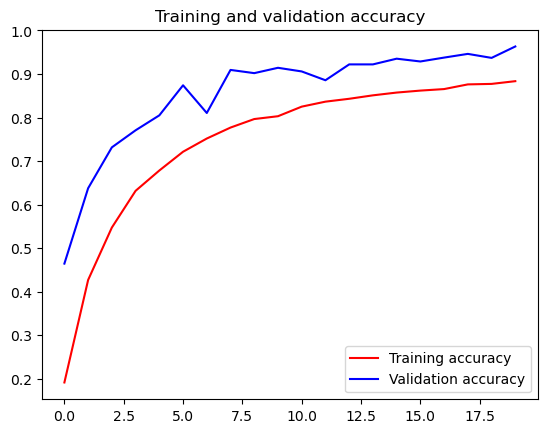

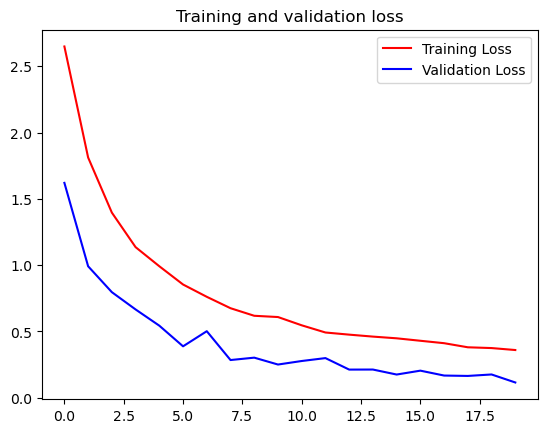

In [14]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 📊 Taking a look at the model

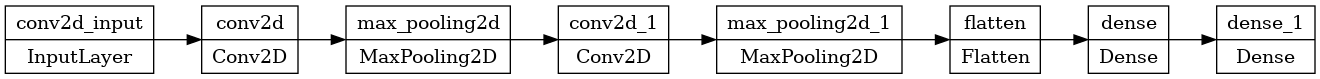

In [15]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=False, rankdir='LR')

***

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            Thanks for viewing my work. If you like it, consider sharing it to others or give feedback to improve the notebook.
        </p>
    </div>
